### aim: visualize basic maps for comparing between models
### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:

def make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2 = 1):

    UKESMscen = 'UKESM_1A'
    TOMscen = 'TOM12_TJ_1ASA'
    mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'
    fact = 1.1
    fig, axs = plt.subplots(3,4, figsize=(14*fact, 8*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    of = 0; toy = 'FYR' 
    p1 = pickle.load(open(f'{mapdir}{UKESMscen}_{UKESMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) #mmol-C/m2/d
    p2 = pickle.load(open(f'{mapdir}{TOMscen}_{TOMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) * fact2 #mol/m2/s > mmolC/m2/day
    p2[p2 == 0] = np.nan
    print(np.nanmax(p1)); print(np.nanmin(p1))
    print(np.nanmax(p2)); print(np.nanmin(p2))
    w = axs[0+of].pcolormesh(p1[38:-1,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[1+of].pcolormesh(p2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[2+of].pcolormesh(p1[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[3+of].pcolormesh(p2[0:37,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)

    of = 4; toy = 'DJF' 
    p1 = pickle.load(open(f'{mapdir}{UKESMscen}_{UKESMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) #mmol-C/m2/d
    p2 = pickle.load(open(f'{mapdir}{TOMscen}_{TOMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) * fact2 #mol/m2/s > mmolC/m2/day
    p2[p2 == 0] = np.nan
    w = axs[0+of].pcolormesh(p1[38:-1,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[1+of].pcolormesh(p2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[2+of].pcolormesh(p1[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[3+of].pcolormesh(p2[0:37,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)

    of = 8; toy = 'JJA' 
    p3 = pickle.load(open(f'{mapdir}{UKESMscen}_{UKESMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) #mmol-C/m2/d
    p4 = pickle.load(open(f'{mapdir}{TOMscen}_{TOMvar}_{toy}_surfaceFullGlobe_1955_1960.pkl', 'rb')) * fact2 #mol/m2/s > mmolC/m2/day
    p4[p4 == 0] = np.nan
    w = axs[0+of].pcolormesh(p3[38:-1,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[1+of].pcolormesh(p4, vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[2+of].pcolormesh(p3[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    axs[3+of].pcolormesh(p4[0:37,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
    print('?')
    print(np.nanmax(p1-p3))
    
    fig.subplots_adjust(right=0.93)
    cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(w, cax=cbar_ax)
    cbar.set_label(cbarlab, rotation=270, fontsize = 14)

    ttit = ['UKESM, FULL YEAR', 'TOM, FULL YEAR', 'UKESM, FULL YEAR \n(S. OCEAN)', 'TOM, FULL YEAR \n (S. OCEAN)', 
            'DJF', 'DJF', 'DJF', 'DJF', 
            'JJA', 'JJA', 'JJA', 'JJA',]
    for i in range(0,12):
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        axs[i].set_title(ttit[i])
    
    fig.suptitle(tsuptit, y = 1, fontsize = 16)
    # plt.tight_layout()
    plt.show()



44.804027239481606
4.3074491421381635
42.118145
6.7471848


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


?
7.985129886203342


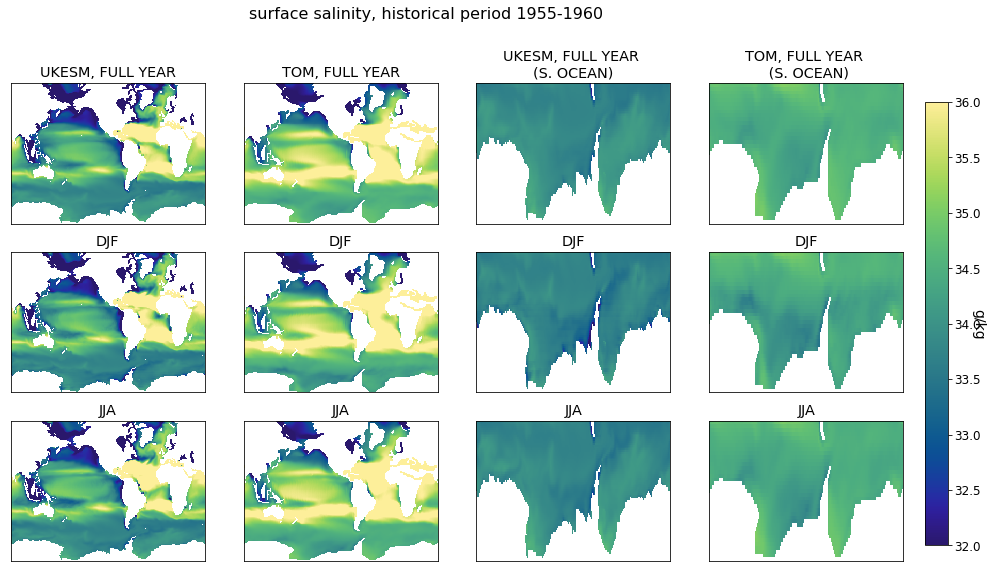

In [5]:
UKESMvar = 'so'
TOMvar = 'vosaline'
tvmin = 32
tvmax = 36
tcmap = cm.haline
fact2 = 1# 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
cbarlab = 'g/kg'
tsuptit = 'surface salinity, historical period 1955-1960'
make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2)


16.824722043673198
-41.81705859502157
14.854905248284922
-27.700506234396016
?
15.910823925336201


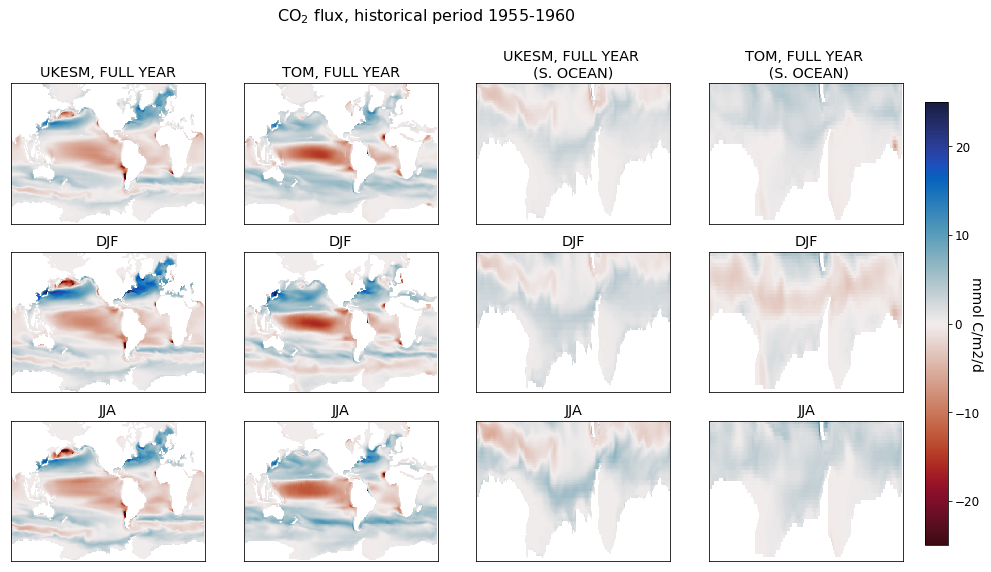

32.94887140062121
-1.9466286798318226
31.80539
-1.8682827
?
4.956180095672607


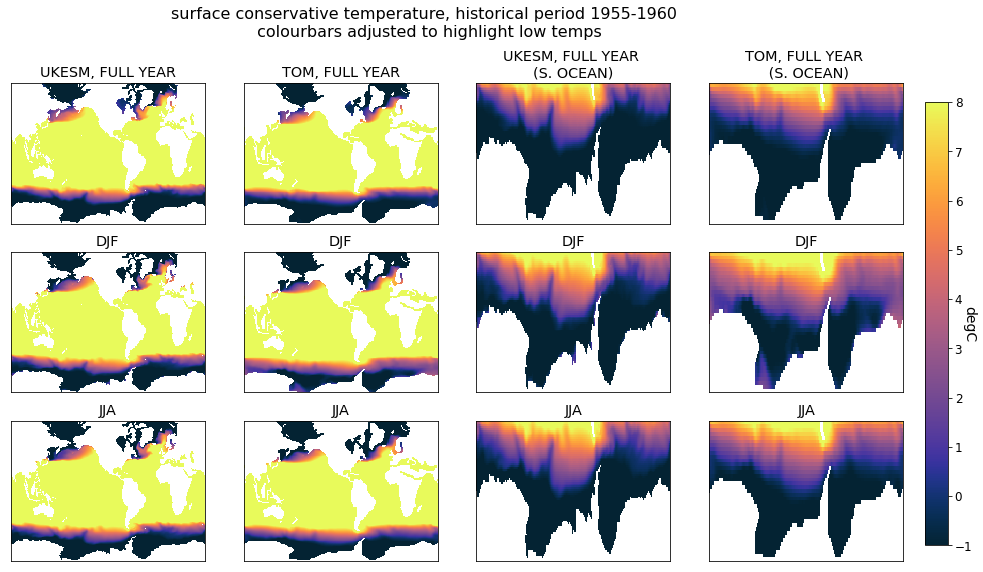

628.1570505777995
0.0
1362.2294
11.977599
?
115.7319295247396


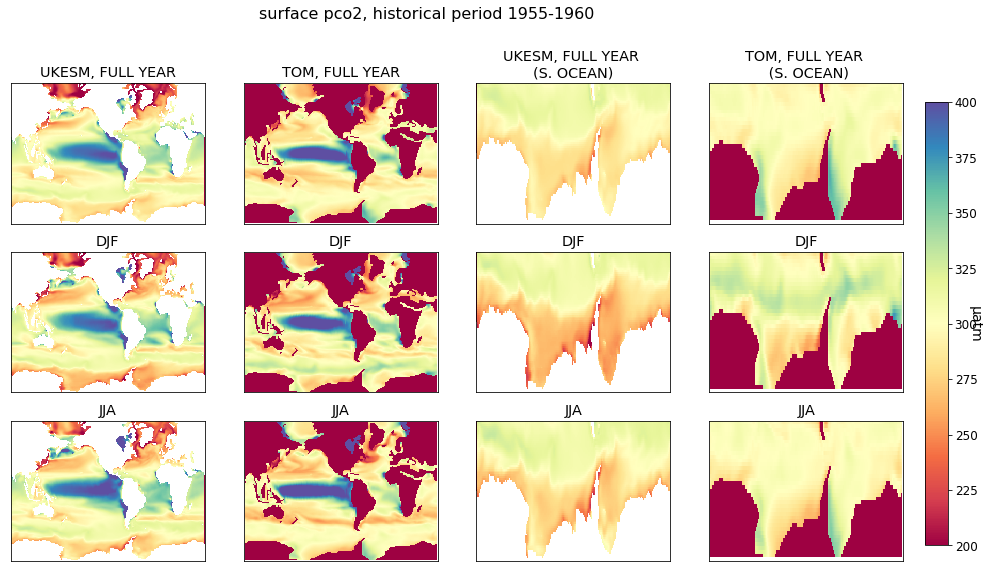

In [6]:
UKESMvar = 'CO2FLUX'
TOMvar = 'Cflx'
tvmin = -25
tvmax = 25
tcmap = cm.balance_r
fact2 = 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
cbarlab = 'mmol C/m2/d'
tsuptit = 'CO$_2$ flux, historical period 1955-1960'
make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2)




UKESMvar = 'thetao'
TOMvar = 'votemper'
tvmin = -1
tvmax = 8
tcmap = cm.thermal
fact2 = 1# 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
cbarlab = 'degC'
tsuptit = 'surface conservative temperature, historical period 1955-1960 \n colourbars adjusted to highlight low temps'
make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2)

UKESMvar = 'OCN_PCO2'
TOMvar = 'pCO2'
tvmin = 200
tvmax = 400
tcmap = 'Spectral'
fact2 = 1# 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
cbarlab = 'µatm'
tsuptit = 'surface pco2, historical period 1955-1960'
make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2)



### timeseries

553.5012132326763
10.567646058400474
2340.5713
10.110849
?
452.497172609965


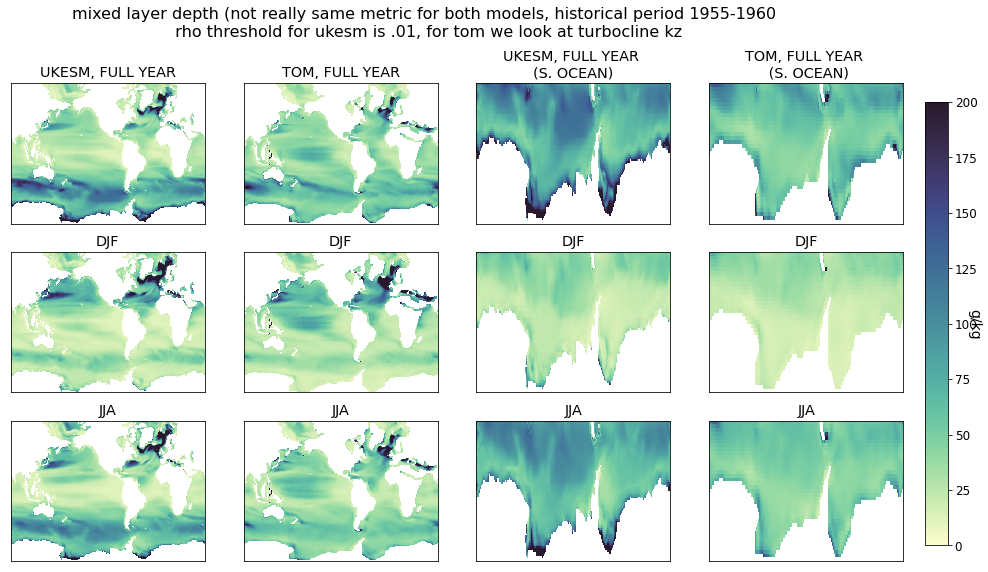

In [10]:
UKESMvar = 'somxl010'
TOMvar = 'mldkz5'
tvmin = 0
tvmax = 200
tcmap = cm.deep
fact2 = 1# 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
cbarlab = 'g/kg'
tsuptit = 'mixed layer depth (not really same metric for both models, historical period 1955-1960 \n rho threshold for ukesm is .01 (somxl010), for tom we look at turbocline "mldkz5"'
make_map(tvmin, tvmax, UKESMvar, TOMvar, tcmap, cbarlab, tsuptit, fact2)

In [8]:
mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'
ukesm_T_SO = pickle.load(open(f'{mapdir}UKESM_1A_thetao_southocean-50_ts_1950_2100.pkl', 'rb'))
tom_T_SO = pickle.load(open(f'{mapdir}TOM12_TJ_1ASA_votemper_southocean-50_ts_1950_2100.pkl', 'rb'))
ukesm_S_SO = pickle.load(open(f'{mapdir}UKESM_1A_so_southocean-50_ts_1950_2100.pkl', 'rb'))
tom_S_SO = pickle.load(open(f'{mapdir}TOM12_TJ_1ASA_vosaline_southocean-50_ts_1950_2100.pkl', 'rb'))

ukesm_T_FD = pickle.load(open(f'{mapdir}UKESM_1A_thetao_fulldomain_ts_1950_2100.pkl', 'rb'))
tom_T_FD = pickle.load(open(f'{mapdir}TOM12_TJ_1ASA_votemper_fulldomain_ts_1950_2100.pkl', 'rb'))
ukesm_S_FD = pickle.load(open(f'{mapdir}UKESM_1A_so_fulldomain_ts_1950_2100.pkl', 'rb'))
tom_S_FD = pickle.load(open(f'{mapdir}TOM12_TJ_1ASA_vosaline_fulldomain_ts_1950_2100.pkl', 'rb'))

ukesm_T_FD_ym = ukesm_T_FD.groupby('time_counter.year').mean().values
tom_T_FD_ym = tom_T_FD.groupby('time_counter.year').mean().values
ukesm_S_FD_ym = ukesm_S_FD.groupby('time_counter.year').mean().values
tom_S_FD_ym = tom_S_FD.groupby('time_counter.year').mean().values

ukesm_T_SO_ym = ukesm_T_SO.groupby('time_counter.year').mean().values
tom_T_SO_ym = tom_T_SO.groupby('time_counter.year').mean().values
ukesm_S_SO_ym = ukesm_S_SO.groupby('time_counter.year').mean().values
tom_S_SO_ym = tom_S_SO.groupby('time_counter.year').mean().values


KeyboardInterrupt: 

In [ ]:

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()
yrs = np.arange(1950,2100)
print(np.shape(ukesm_T_FD_ym))
axs[0].plot(yrs, ukesm_T_FD_ym[0:150],'k-',label = 'UKESM')
axs[0].plot(yrs, tom_T_FD_ym[0:150],'k:', label = 'TOM12 (1ASA)')
axs[1].plot(yrs, ukesm_T_SO_ym[0:150],'k-',label = 'UKESM')
axs[1].plot(yrs, tom_T_SO_ym[0:150],'k:', label = 'TOM12 (1ASA)')

axs[2].plot(yrs, ukesm_S_FD_ym[0:150],'k-',label = 'UKESM')
axs[2].plot(yrs, tom_S_FD_ym[0:150],'k:', label = 'TOM12 (1ASA)')
axs[3].plot(yrs, ukesm_S_SO_ym[0:150],'k-',label = 'UKESM')
axs[3].plot(yrs, tom_S_SO_ym[0:150],'k:', label = 'TOM12 (1ASA)')

tits = ['full domain surface T', 'SO (<50) surface T',  'full domain surface S', 'SO (<50) surface S',\
        'full domain surface MLD', 'SO (<50) surface MLD']

for i in range(0,6):
    axs[i].grid()
    axs[i].set_title(tits[i])
    axs[0].legend()
    axs[i].set_xlim([1950,2100])
    
plt.tight_layout()

## cflx

extract in pickle flux means

In [ ]:
UKESM_1A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
UKESM_1B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
UKESM_2A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
UKESM_2B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
UKESM_3A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
UKESM_3B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))

TOM12_1A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
TOM12_1B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
TOM12_2A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
TOM12_2B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
TOM12_3A_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3A_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))
TOM12_3B_CO2FLUX_SO_DJF = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3B_CO2FLUX_SO_DJF_vals_19500-2100.pkl', 'rb'))

# UKESM_1A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
# UKESM_1B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
# UKESM_2A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
# UKESM_2B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
# UKESM_3A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
# UKESM_3B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))

UKESM_1A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_1B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_2A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_2B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_3A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_3B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
UKESM_1A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_1B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_2A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_2B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_3A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_3B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
UKESM_1A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
UKESM_1B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_1B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
UKESM_2A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
UKESM_2B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_2B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
UKESM_3A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
UKESM_3B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/UKESM_3B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))

TOM12_1A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
TOM12_1B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
TOM12_2A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
TOM12_2B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
TOM12_3A_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3A_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))
TOM12_3B_CO2FLUX_SO_FY = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3B_CO2FLUX_SO_FY_vals_19500-2100.pkl', 'rb'))

TOM12_1A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_1B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_2A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_2B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_3A_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3A_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_3B_CO2FLUX_SO_MAM = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3B_CO2FLUX_SO_MAM_vals_19500-2100.pkl', 'rb'))
TOM12_1A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_1B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_2A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_2B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_3A_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3A_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_3B_CO2FLUX_SO_JJA = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3B_CO2FLUX_SO_JJA_vals_19500-2100.pkl', 'rb'))
TOM12_1A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
TOM12_1B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_1B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
TOM12_2A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
TOM12_2B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_2B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
TOM12_3A_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3A_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))
TOM12_3B_CO2FLUX_SO_SON = pickle.load(open('./BSUB_extractions/EXTRACT/TOM12_3B_CO2FLUX_SO_SON_vals_19500-2100.pkl', 'rb'))

In [ ]:
scendict = {
    # Baynes Sound
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'color2':'orange'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'color2':'orangered'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'color2':'mediumseagreen'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'color2':'green'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'color2':'dodgerblue'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'color2':'mediumblue'}
}

tcol = [scendict['1A']['color'],scendict['1B']['color'],scendict['2A']['color'],scendict['2B']['color'],\
        scendict['3A']['color'],scendict['3B']['color'],]

In [ ]:
UKESM_DJF = [UKESM_1A_CO2FLUX_SO_DJF, UKESM_1B_CO2FLUX_SO_DJF, UKESM_2A_CO2FLUX_SO_DJF,\
             UKESM_2B_CO2FLUX_SO_DJF, UKESM_3A_CO2FLUX_SO_DJF, UKESM_3A_CO2FLUX_SO_DJF]
UKESM_MAM = [UKESM_1A_CO2FLUX_SO_MAM, UKESM_1B_CO2FLUX_SO_MAM, UKESM_2A_CO2FLUX_SO_MAM,\
             UKESM_2B_CO2FLUX_SO_MAM, UKESM_3A_CO2FLUX_SO_MAM, UKESM_3A_CO2FLUX_SO_MAM]
UKESM_JJA = [UKESM_1A_CO2FLUX_SO_JJA, UKESM_1B_CO2FLUX_SO_JJA, UKESM_2A_CO2FLUX_SO_JJA,\
             UKESM_2B_CO2FLUX_SO_JJA, UKESM_3A_CO2FLUX_SO_JJA, UKESM_3A_CO2FLUX_SO_JJA]
UKESM_SON = [UKESM_1A_CO2FLUX_SO_SON, UKESM_1B_CO2FLUX_SO_SON, UKESM_2A_CO2FLUX_SO_SON,
             UKESM_2B_CO2FLUX_SO_SON, UKESM_3A_CO2FLUX_SO_SON, UKESM_3A_CO2FLUX_SO_SON]
# UKESM_FY = [UKESM_1A_CO2FLUX_SO_FY, UKESM_1B_CO2FLUX_SO_FY, UKESM_2A_CO2FLUX_SO_FY,\
#              UKESM_2B_CO2FLUX_SO_FY, UKESM_3A_CO2FLUX_SO_FY, UKESM_3A_CO2FLUX_SO_FY]

TOM12_DJF = [TOM12_1A_CO2FLUX_SO_DJF, TOM12_1B_CO2FLUX_SO_DJF, TOM12_2A_CO2FLUX_SO_DJF,\
             TOM12_2B_CO2FLUX_SO_DJF, TOM12_3A_CO2FLUX_SO_DJF, TOM12_3A_CO2FLUX_SO_DJF]
TOM12_MAM = [TOM12_1A_CO2FLUX_SO_MAM, TOM12_1B_CO2FLUX_SO_MAM, TOM12_2A_CO2FLUX_SO_MAM,\
             TOM12_2B_CO2FLUX_SO_MAM, TOM12_3A_CO2FLUX_SO_MAM, TOM12_3A_CO2FLUX_SO_MAM]
TOM12_JJA = [TOM12_1A_CO2FLUX_SO_JJA, TOM12_1B_CO2FLUX_SO_JJA, TOM12_2A_CO2FLUX_SO_JJA,\
             TOM12_2B_CO2FLUX_SO_JJA, TOM12_3A_CO2FLUX_SO_JJA, TOM12_3A_CO2FLUX_SO_JJA]
TOM12_SON = [TOM12_1A_CO2FLUX_SO_SON, TOM12_1B_CO2FLUX_SO_SON, TOM12_2A_CO2FLUX_SO_SON,\
             TOM12_2B_CO2FLUX_SO_SON, TOM12_3A_CO2FLUX_SO_SON, TOM12_3A_CO2FLUX_SO_SON]
TOM12_FY = [TOM12_1A_CO2FLUX_SO_FY, TOM12_1B_CO2FLUX_SO_FY, TOM12_2A_CO2FLUX_SO_FY,\
             TOM12_2B_CO2FLUX_SO_FY, TOM12_3A_CO2FLUX_SO_FY, TOM12_3A_CO2FLUX_SO_FY]

yrs = np.arange(1950,2100); dumar = np.arange(1950,2100)
dumarar = [dumar, dumar, dumar, dumar, dumar, dumar]

tcol = [scendict['1A']['color'],scendict['1B']['color'],scendict['2A']['color'],scendict['2B']['color'],\
        scendict['3A']['color'],scendict['3B']['color'],]
lab = ['1A', '1B', '2A', '2B', '3A', '3B']
fact2 = 1000* 60*60*24 #mol/m2/s > mmolC/m2/day
tits = ['full year','','DJF','MAM','JJA','SON']


fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tar = dumarar
tar2 = dumarar
# for i in range(0,6):
#     axs[0].plot(yrs,tar[i][0:150], color = tcol[i], label = f'UKESM {lab[i]}', linestyle = '-')
#     axs[0].plot(yrs,tar2[i][0:150]*fact2, color = tcol[i],label = f'TOM12 {lab[i]}', linestyle = ':')
    
tar = UKESM_DJF
tar2 = TOM12_DJF
for i in range(0,2):
    t = UKESM_DJF[0]
    t2 = UKESM_DJF[1]
    tz = t-t2
    axs[2].plot(yrs,tz[0:150], color = tcol[i], label = f'UKESM {lab[i]}', linestyle = '-')
#     axs[2].plot(yrs,tar2[i][0:150]*fact2, color = tcol[i],label = f'TOM12 {lab[i]}', linestyle = ':')
    
tar = UKESM_MAM
tar2 = TOM12_MAM 
for i in range(0,6):
    axs[3].plot(yrs,tar[i][0:150], color = tcol[i], label = f'UKESM {lab[i]}', linestyle = '-')
    axs[3].plot(yrs,tar2[i][0:150]*fact2, color = tcol[i],label = f'TOM12 {lab[i]}', linestyle = ':')
    
    
tar = UKESM_JJA
tar2 = TOM12_JJA
for i in range(0,6):
    axs[4].plot(yrs,tar[i][0:150], color = tcol[i], label = f'UKESM {lab[i]}', linestyle = '-')
    axs[4].plot(yrs,tar2[i][0:150]*fact2, color = tcol[i],label = f'TOM12 {lab[i]}', linestyle = ':')
    
tar = UKESM_SON
tar2 = TOM12_SON 
for i in range(0,6):
    axs[5].plot(yrs,tar[i][0:150], color = tcol[i], label = f'UKESM {lab[i]}', linestyle = '-')
    axs[5].plot(yrs,tar2[i][0:150]*fact2, color = tcol[i],label = f'TOM12 {lab[i]}', linestyle = ':')
    
for i in range(0,6):
    axs[i].set_title(tits[i])
    axs[0].set_ylabel('mmol C/m2/day')
    axs[i].grid()
    axs[i].set_xlim([1950,2100])
    axs[2].legend(fontsize = 10, ncol = 3)


In [ ]:
mapdir = '/gpfs/home/mep22dku/scratch/SOZONE/MEDUSA/BSUB_extractions/EXTRACT/'

thov = f'{mapdir}/TOM12_TJ_3ASA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_3A = p1.values.T
thov = f'{mapdir}/TOM12_TJ_2ASA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_2A = p1.values.T
thov = f'{mapdir}/TOM12_TJ_1ASA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_1A = p1.values.T
thov = f'{mapdir}/TOM12_TJ_3BSA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_3B = p1.values.T
thov = f'{mapdir}/TOM12_TJ_2BSA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_2B = p1.values.T
thov = f'{mapdir}/TOM12_TJ_1BSA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_1B = p1.values.T
###
thov = f'{mapdir}/UKESM_3A_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_3A = p1.values.T
thov = f'{mapdir}/UKESM_2A_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_2A = p1.values.T
thov = f'{mapdir}/UKESM_1A_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_1A = p1.values.T
thov = f'{mapdir}/UKESM_3B_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_3B = p1.values.T
thov = f'{mapdir}/UKESM_2B_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_2B = p1.values.T
thov = f'{mapdir}/UKESM_1B_CO2FLUX_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
UKESM_1B = p1.values.T

In [ ]:
thov = f'{mapdir}/TOM12_TJ_3ASA_Cflx_lathovmoller_1950_2100.pkl'
p1 = pickle.load(open(thov, 'rb'))
TOM12_3A = p1.values.T

In [ ]:
tvmin = -1e-7
tvmax = 1e-7
tcmap = cm.balance_r

fact = 1.1

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

thov = f'{mapdir}/TOM12_TJ_1ASA_Cflx_lathovmoller_1950_2100.pkl'
TOM12_1A = pickle.load(open(thov, 'rb'))
w = TOM12_3A.T
w.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)



axs[1].set_yticks(np.arange(0,160,20))

In [ ]:
print(np.shape(UKESM_1A))
print(np.shape(yrs))

In [ ]:
TOM12_3A

In [ ]:
tvmin = -1e-7*fact2
tvmax = 1e-7*fact2
tcmap = cm.balance_r

fact = 0.8
fig, axs = plt.subplots(6,2, figsize=(18*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


w = axs[0].pcolormesh(UKESM_1A[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[2].pcolormesh(UKESM_2A[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[4].pcolormesh(UKESM_3A[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[6].pcolormesh(UKESM_1B[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[8].pcolormesh(UKESM_2B[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[10].pcolormesh(UKESM_3B[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)

axs[1].pcolormesh(TOM12_1A[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[3].pcolormesh(TOM12_2A[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[5].pcolormesh(TOM12_3A[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[7].pcolormesh(TOM12_1B[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[9].pcolormesh(TOM12_2B[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[11].pcolormesh(TOM12_3B[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)

tit = ['UKESM 1A', 'TOM12 1A',
       'UKESM 2A', 'TOM12 2A',
       'UKESM 3A', 'TOM12 3A',
       'UKESM 1B', 'TOM12 1B',
       'UKESM 2B', 'TOM12 2B',
       'UKESM 3B', 'TOM12 3B']
for i in range(0,12):
    axs[i].set_xticks(np.arange(0,1800,240))
    axs[i].set_xticklabels(np.arange(1950,2100,20))
    axs[i].set_yticks([])
    axs[0].set_ylabel('approx. \n -75 to -50N')
    axs[i].set_title(tit[i])
    
plt.suptitle('preliminary CflX hovmoller A=lowtemp, 1=hist, 2= no ozonehole, 3=ozone90')

plt.tight_layout()

fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = fig.colorbar(w, cax=cbar_ax)
cbar.set_label('mmolc/m2/day', rotation=270, fontsize = 14)



In [ ]:
tvmin = -1e-7*fact2
tvmax = 1e-7*fact2
tcmap = cm.balance_r

fact = 0.8
fig, axs = plt.subplots(6,2, figsize=(18*fact, 16*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].pcolormesh(UKESM_1A[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[2].pcolormesh((UKESM_1A[38:114,:]-UKESM_2A[38:114,:]), vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[4].pcolormesh((UKESM_1A[38:114,:]-UKESM_3A[38:114,:]), vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[6].pcolormesh(UKESM_1B[38:114,:], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[8].pcolormesh((UKESM_1B[38:114,:]-UKESM_2B[38:114,:]), vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[10].pcolormesh((UKESM_1B[38:114,:]-UKESM_3B[38:114,:]), vmin = tvmin, vmax = tvmax, cmap = tcmap)

axs[1].pcolormesh(TOM12_1A[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[3].pcolormesh((TOM12_1A[0:37,:]-TOM12_2A[0:37,:])*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[5].pcolormesh((TOM12_1A[0:37,:]-TOM12_3A[0:37,:])*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[7].pcolormesh(TOM12_1B[0:37,:]*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[9].pcolormesh((TOM12_1B[0:37,:]-TOM12_2B[0:37,:])*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[11].pcolormesh((TOM12_1B[0:37,:]-TOM12_3B[0:37,:])*fact2, vmin = tvmin, vmax = tvmax, cmap = tcmap)


tit = ['UKESM 1A', 'TOM12 1A',
       'UKESM 1A-2A', 'TOM12 1A-2A',
       'UKESM 1A-3A', 'TOM12 1A-3A',
       'UKESM 1B', 'TOM12 1B',
       'UKESM 1B-2B', 'TOM12 1B-2B',
       'UKESM 1B-3B', 'TOM12 1B-3B']
for i in range(0,12):
    axs[i].set_xticks(np.arange(0,1800,240))
    axs[i].set_xticklabels(np.arange(1950,2100,20))
    axs[i].set_yticks([])
    axs[0].set_ylabel('approx. \n -75 to -50N')
    axs[i].set_title(tit[i])
    
plt.suptitle('preliminary CflX difference hovmoller A=lowtemp, 1=hist, 2= no ozonehole, 3=ozone90')

plt.tight_layout()

fig.subplots_adjust(right=0.93)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
cbar = fig.colorbar(w, cax=cbar_ax)
cbar.set_label('mmolc/m2/day', rotation=270, fontsize = 14)



#DJF hovmoller 

print(w2)
tvmin = 250
tvmax = 450
tcmap = 'Spectral_r'

fact = 1.1
fig, axs = plt.subplots(3,2, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = tom.pCO2.weighted(tmesh['csize']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[1], vmin = tvmin, vmax = tvmax, cmap = tcmap)
axs[1].set_yticks(np.arange(0,160,20))
axs[1].set_yticklabels(tomlat)

w = tom.pCO2.sel(time_counter=(tom['time_counter.season'] == 'DJF')).weighted(tmesh['csize']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[3], vmin = tvmin, vmax = tvmax, cmap = tcmap)

w = tom.pCO2.sel(time_counter=(tom['time_counter.season'] == 'JJA')).weighted(tmesh['csize']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[5], vmin = tvmin, vmax = tvmax, cmap = tcmap)

#######
w = ukesm.OCN_PCO2.weighted(ukmesh['area']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[0], vmin = tvmin, vmax = tvmax, cmap = tcmap)

w = ukesm.OCN_PCO2.sel(time_counter=(ukesm['time_counter.season'] == 'DJF')).weighted(ukmesh['area']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[2], vmin = tvmin, vmax = tvmax, cmap = tcmap)

w = ukesm.OCN_PCO2.sel(time_counter=(ukesm['time_counter.season'] == 'JJA')).weighted(ukmesh['area']).mean(dim = ['x']).T
w2 = w.groupby('time_counter.year').mean()  
w2.plot(ax = axs[4], vmin = tvmin, vmax = tvmax, cmap = tcmap)


axs[1].set_yticks(np.arange(0,160,20))
axs[1].set_yticklabels(tomlat)
axs[3].set_yticks(np.arange(0,160,20))
axs[3].set_yticklabels(tomlat)
axs[5].set_yticks(np.arange(0,160,20))
axs[5].set_yticklabels(tomlat)

axs[0].set_yticks(np.arange(0,360,30))
axs[0].set_yticklabels(ukesmlat)
axs[2].set_yticks(np.arange(0,360,30))
axs[2].set_yticklabels(ukesmlat)
axs[4].set_yticks(np.arange(0,360,30))
axs[4].set_yticklabels(ukesmlat)



In [ ]:


# tchun_yrm = ukesmvar.groupby('time_counter.year').mean('time_counter')
# #print(tchun_yrm)

# som = tchun_yrm.weighted(area).mean(dim = ['y', 'x']).values




In [ ]:
print(som)